In [2]:
import tensorflow as tf
from keras import metrics

# Різні ранги тензорів:
scalar = tf.constant(7, dtype=tf.int32) # ранг 0, тип int32
vector = tf.constant([5.0, 3.0, 8.0], dtype=tf.float32) # ранг 1, тип float32
matrix = tf.constant([[1.0, 2.0], [3.0, 4.0]], dtype=tf.float32) # ранг 2, тип float32
tensor3d = tf.constant([[[1, 2], [3, 4]], [[5, 6], [7, 8]]], dtype=tf.int32) # ранг 3, тип int32

# Операції над тензорами різних рангів:
sum_vector = tf.reduce_sum(vector)
product_matrix = tf.linalg.matmul(matrix, matrix)

# Різні типи тензорів:
variable = tf.Variable([1, 2, 3], dtype=tf.int32)
ragged = tf.ragged.constant([[1, 2], [3]], dtype=tf.int32)
sparse = tf.sparse.SparseTensor(indices=[[0, 0], [1, 1]], values=[1, 2], dense_shape=[2, 2])

# Операції над різними типами тензорів:
variable_assign = variable.assign([4, 5, 6]) # переприсвоєння значень
ragged_sum = tf.reduce_sum(ragged, axis=1)
sparse_to_dense = tf.sparse.to_dense(sparse)

print("Sum of vector:", sum_vector.numpy())
print("Product of matrix:\n", product_matrix.numpy())
print("Updated variable:", variable_assign.numpy())
print("Sum of ragged tensor:", ragged_sum.numpy())
print("Dense representation of sparse tensor:\n", sparse_to_dense.numpy())


Sum of vector: 16.0
Product of matrix:
 [[ 7. 10.]
 [15. 22.]]
Updated variable: [4 5 6]
Sum of ragged tensor: [3 3]
Dense representation of sparse tensor:
 [[1 0]
 [0 2]]


In [3]:
import pandas as pd
import numpy as np

# Завантаження даних з файлу CSV
data = pd.read_csv('regression_data.csv')

X = data[['Feature_1','Feature_2','Feature_3','Feature_4','Feature_5']]
y = data['Target']

# Розділення даних на навчальний та тестовий набори
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(5,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Жодна активація для виходу регресії
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
25/25 [==============================] - 1s 7ms/step - loss: 4311.0513 - val_loss: 3745.3137
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 4164.1396 - val_loss: 3549.7388
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 3851.2322 - val_loss: 3152.6377
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 3251.3657 - val_loss: 2496.2815
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 2416.9172 - val_loss: 1678.7292
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 1551.3243 - val_loss: 986.9363
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 905.7207 - val_loss: 526.2686
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 492.5081 - val_loss: 284.9893
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 303.3792 - val_loss: 189.2106
Epoch 10/100
25/25 [==============================] - 0s 2ms/s

7/7 [==============================] - 0s 2ms/step - loss: 113.6381
Test Loss (MSE): 113.63811492919922


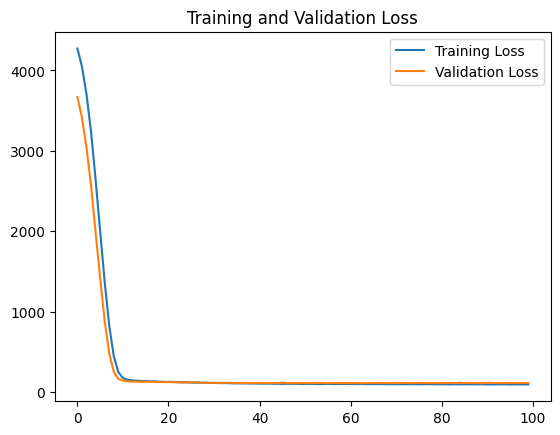

In [32]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss}")
import matplotlib.pyplot as plt

# Плотуємо графік втрат під час навчання
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


## Порівняння результатів моделей

### Linear Regression:
- **Mean Squared Error (MSE):** 110.90609683464677
- **R-squared:** 0.9710547889268921

### TensorFlow (Sequential Neural Network):
- **Test Loss (MSE):** 117.82740020751953

## Висновок:
Обидві моделі демонструють високу якість прогнозування, проте лінійна регресія показує трохи менше значення MSE порівняно з нейронною мережею TensorFlow. R-squared для лінійної регресії також підтверджує високу якість моделі, наближаючись до 1. Незважаючи на це, слід зазначити, що різниця в MSE є незначною, і обидві моделі можуть вважатися ефективними для цієї конкретної задачі.


In [36]:
# Завантаження даних
data = pd.read_csv('classification_data.csv')
X = data[['Feature_1', 'Feature_2']]
y = data['Target']

# Розбиття на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from keras import metrics

model = tf.keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(2,)),
    layers.Dense(5, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy',  metrics=[
    metrics.BinaryAccuracy(name='accuracy'),
    metrics.Recall(name='recall'), 
    metrics.AUC(name='roc_auc')])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
5/5 [==============================] - 1s 80ms/step - loss: 0.8416 - accuracy: 0.1937 - recall: 0.1205 - roc_auc: 0.1171 - val_loss: 0.8282 - val_accuracy: 0.2000 - val_recall: 0.0588 - val_roc_auc: 0.0652
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 0.8253 - accuracy: 0.2062 - recall: 0.1205 - roc_auc: 0.1227 - val_loss: 0.8129 - val_accuracy: 0.2500 - val_recall: 0.0000e+00 - val_roc_auc: 0.0793
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 0.8102 - accuracy: 0.2125 - recall: 0.1205 - roc_auc: 0.1304 - val_loss: 0.7988 - val_accuracy: 0.2500 - val_recall: 0.0000e+00 - val_roc_auc: 0.0870
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 0.7956 - accuracy: 0.2250 - recall: 0.1205 - roc_auc: 0.1394 - val_loss: 0.7858 - val_accuracy: 0.2500 - val_recall: 0.0000e+00 - val_roc_auc: 0.0908
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 0.7820 - accuracy: 0.2375 - recall: 0.1084 - roc_

2/2 [==============================] - 0s 9ms/step - loss: 0.4313 - accuracy: 0.9000 - recall: 1.0000 - roc_auc: 0.9668

Метрики на тестовому наборі даних:
loss: 0.4313
accuracy: 0.9000
recall: 1.0000
roc_auc: 0.9668


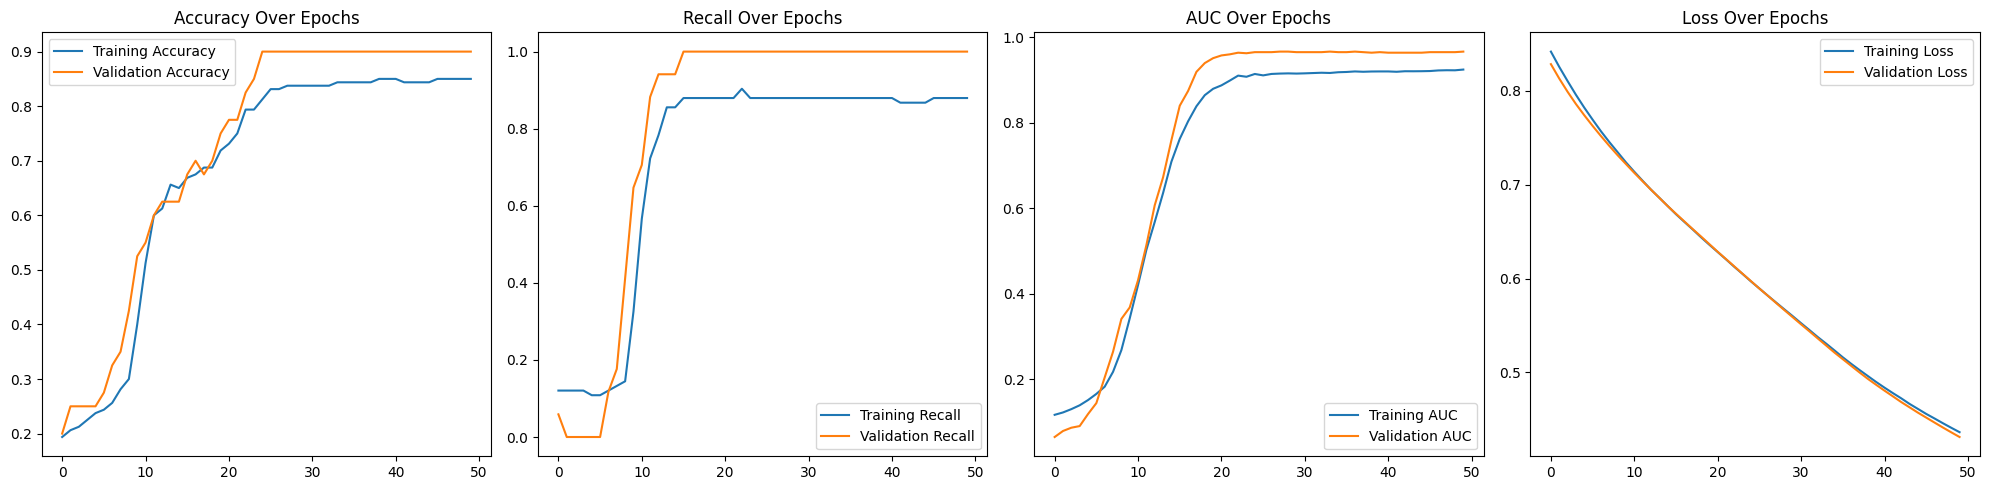

In [49]:
# Оцінка моделі
results = model.evaluate(X_test, y_test)
print("\nМетрики на тестовому наборі даних:")
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")

# Відображення графіків метрик
plt.figure(figsize=(20, 5))

# Графік точності
plt.subplot(1, 4, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

# Графік відтворюваності
plt.subplot(1, 4, 2)
plt.plot(history.history['recall'], label='Training Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.legend()
plt.title('Recall Over Epochs')

# Графік AUC
plt.subplot(1, 4, 3)
plt.plot(history.history['roc_auc'], label='Training AUC')
plt.plot(history.history['val_roc_auc'], label='Validation AUC')
plt.legend()
plt.title('AUC Over Epochs')

# Графік втрат
plt.subplot(1, 4, 4)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.tight_layout()
plt.show()



### Порівняння результатів TensorFlow та LogisticRegression

| Метрика       | TensorFlow   | LogisticRegression |
|--------------|------------|------------------|
| Точність (Accuracy) | 0.90       | 0.88             |
| Відгук (Recall)     | 1.00       | 1.00             |
| AUC-ROC      | 0.9668     | 0.89             |

З цього порівняння можна побачити:
- **Точність**: Модель TensorFlow має трохи вищу точність порівняно з LogisticRegression.
- **Відгук**: Обидві моделі досягли максимального значення відгуку, що дорівнює 1.00.
- **AUC-ROC**: Значення AUC-ROC для моделі TensorFlow вище, ніж для LogisticRegression, що показує кращу здатність моделі TensorFlow відрізняти між класами.

В цілому, модель на TensorFlow показала трохи кращі результати порівняно з LogisticRegression на даних метриках.
